<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [2]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self, eta=1e-3, num_epochs=3, batch_size=1):
        self.eta = eta
        self.num_epochs = num_epochs
        self.mse_ = []
        self.weights_ = []
        self.batch_size = batch_size

        
    def fit(self, X:np.array, y:np.array):
        objects_len, weights_len = X.shape
        weights = np.zeros(weights_len + 1)[:, np.newaxis]
        X_with_ones = np.concatenate([np.ones(objects_len)[:,np.newaxis],X], axis=1)
        import math
#         import pdb; pdb.set_trace()
        mse_min = math.inf
        for i in range(self.num_epochs):
            for j in range(0, objects_len, self.batch_size):
                ending = objects_len if j + self.batch_size >= objects_len else j + self.batch_size 
                X_with_ones_batched = X_with_ones[j:ending ]
                y_true_batched = y[j:ending]
                y_predicted = np.dot(X_with_ones_batched,weights)
#                
                weights = (weights + self.eta * np.dot((y_true_batched  - y_predicted).transpose(), X_with_ones_batched).transpose()).copy()
#                 import pdb; pdb.set_trace()
                loss = self.__mean_squared_error_(y, np.dot(X_with_ones,weights))
                self.mse_.append(loss)
                self.weights_.append(weights)
                if(loss < mse_min):
                    mse_min = loss
                    self.w_ = weights
        return self
            
    def __mean_squared_error_(self, y_real, y_predicted):
        return mean_squared_error(y_real , y_predicted)
    
    def predict(self, X):
        objects_len, weights_len = X.shape
        X_with_ones = np.concatenate([np.ones(objects_len)[:,np.newaxis],X], axis=1)
        return np.dot(X_with_ones,self.w_)

# Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [3]:
data_demo = pd.read_csv('../data/weights_heights.csv')

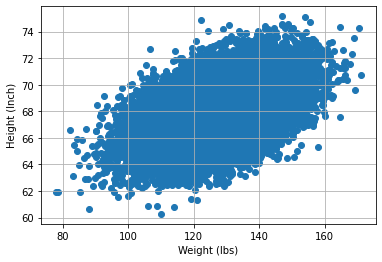

In [4]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [5]:
X, y = data_demo['Weight'].values, data_demo['Height'].values
X = X[:, np.newaxis]
y = y[:, np.newaxis]

Perform train/test split and scale data.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [8]:
X.shape, y.shape

((25000, 1), (25000, 1))

In [9]:
### you code here
model = SGDRegressor(num_epochs=3)
model.fit(X_train_scaled, y_train)

SGDRegressor()

In [10]:
len(model.mse_), np.min(model.mse_), np.argmin(model.mse_)

(52500, 2.7151352406643627, 12626)

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

Text(0, 0.5, 'mse')

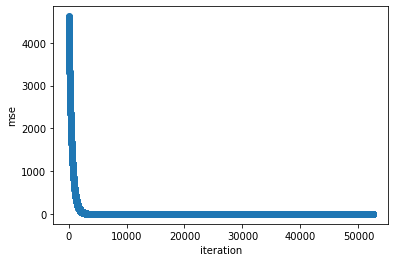

In [11]:
plt.scatter( range(1, len(model.mse_)+1),model.mse_);
plt.xlabel('iteration')
plt.ylabel('mse')

Print the minimal value of mean squared error and the best weights vector.

In [12]:
# you code here
min(model.mse_), model.w_

(2.7151352406643627,
 array([[67.9898497 ],
        [ 0.94447605]]))

Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

Text(0, 0.5, 'weight')

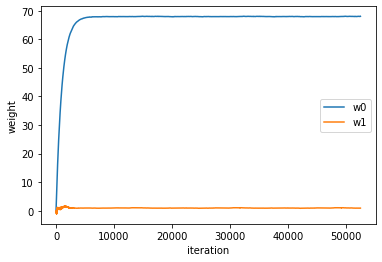

In [13]:
# you code here
plt.plot(range(1, len(model.weights_)+1),np.array(model.weights_)[::,0] );
plt.plot(range(1, len(model.weights_)+1),np.array(model.weights_)[::,1]);
plt.legend(('w0', 'w1'))
plt.xlabel('iteration')
plt.ylabel('weight')


Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [14]:
# you code here
y_test_predicted = model.predict(X_valid_scaled)
sgd_holdout_mse = mean_squared_error(y_test_predicted, y_valid)
sgd_holdout_mse 

2.670868120703378

Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [15]:
# you code here
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_predicted_linear = linear_model.predict(X_valid_scaled)
linreg_holdout_mse = mean_squared_error(y_predicted_linear, y_valid)
linreg_holdout_mse

2.670830767667634

In [16]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
